In [23]:
# 분류 (classification)

# 필요한 라이브러리 불러오기

# 데이터, 시각화 관련 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 분류 관련 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
# train, test data 분리하기 위한 라이브러리

from sklearn.model_selection import train_test_split

In [26]:
# classification 평가를 위한 라이브러리

from sklearn.metrics import confusion_matrix # 혼동행렬 
from sklearn.metrics import precision_score # 정밀도 
from sklearn.metrics import recall_score # 재현율(민감도)
from sklearn.metrics import accuracy_score # 정확도 

In [27]:
# 붓꽃 (iris) 데이터 로딩

from sklearn.datasets import load_iris

In [28]:
# 로지스틱 회귀 

# 맛보기 예제 

# train data 정의

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([0,0,0,1,1,1])

In [29]:
# test data 정의
test_X_plus = [[2,2]] # 모두 양수일 경우 
test_X_minus = [[-2,-2]] # 모두 음수일 경우

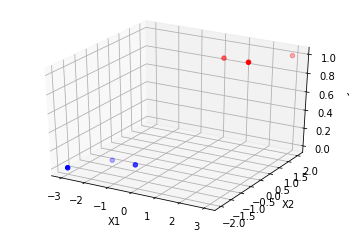

In [30]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter([-1,-2,-3],[-1,-1,-2],[0,0,0],color='blue')
ax.scatter([1,2,3],[1,1,2],[1,1,1],color='red')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

In [31]:
# 훈련 

clf_lr = LogisticRegression()
clf_lr.fit(X,y) # 모델 적합(train data)

LogisticRegression()

In [32]:
# 클래스 확률 예측
clf_lr.predict(test_X_plus)
# 클래스 1로 예측 

array([1])

In [33]:
clf_lr.predict_proba(test_X_plus)
# 클래스 1로 나올 확률 : 95.1% 

array([[0.04891763, 0.95108237]])

In [34]:
clf_lr.predict_proba(test_X_minus)
# 클래스 0으로 나올 확률 : 95.1% 

array([[0.95108237, 0.04891763]])

In [35]:
# 클래스 확률 예측
clf_lr.predict(test_X_minus)
# 클래스 1로 예측 

array([0])

In [37]:
# 간단한 예제 (LDA)

# 훈련

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [39]:
# 클래스 확률 예측
clf_lda.predict_proba(test_X_plus)
# 1번 클래스 

array([[1.12535162e-07, 9.99999887e-01]])

In [40]:
clf_lda.predict(test_X_plus)

array([1])

In [42]:
# 클래스 확률 예측
clf_lda.predict_proba(test_X_minus)
# 0번 클래스 

array([[9.99999887e-01, 1.12535162e-07]])

In [43]:
clf_lda.predict(test_X_minus)

array([0])

In [44]:
# heart 예제

path = '/content/drive/MyDrive/새싹sw-인공지능 서비스 개발자/CLASSROOM/CODE PDF/머신러닝/Heart.csv'

In [46]:
heart = pd.read_csv(path)

In [47]:
heart.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [49]:
# predictor (예측변수)와 response(반응변수) 정의

X = heart[['Age','Sex','Chol']]
y = heart['AHD'] # 심장병의 일종

In [51]:
# train data, test data 구분 

X_train, X_test, y_train, y_test =\
train_test_split(X,y, test_size=0.1,random_state=32,stratify=y)

In [52]:
# 훈련

clf_heart = LinearDiscriminantAnalysis()
clf_heart.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [57]:
y_pred = clf_heart.predict(X_test) # 예측값

In [58]:
# 모델 평가 (잘 분류되었는지)
# >> 혼동행렬(confusion matrix)

cm = confusion_matrix(y_test, y_pred) # 실제값, 예측값
cm 


array([[14,  3],
       [ 7,  7]])

In [64]:
# classification 결과 평가

# Accuracy (정확도)
# (TP +TN)/ALL

print('정확도: ',accuracy_score(y_test, y_pred)) # 67.6%
print()

# precision(정밀도) 
# 예측한 결과가 실제로 맞은 것 
# TP / (TP + FP)
print('정밀도 :',precision_score(y_test,y_pred,average='macro'))
print()

# recall(재현율/민감도)
# 실제를 잘 예측하는 정도도 
print('재현율 :',recall_score(y_test, y_pred, average='macro'))


정확도:  0.6774193548387096

정밀도 : 0.6833333333333333

재현율 : 0.6617647058823529


In [66]:
# 붓꽃(iris)데이터 활용 예제

X,y = load_iris(return_X_y = True)
# X, y 형태로 데이터를 받겠다는 의미

In [68]:
y # 붓꽃 데이터 3개의 클래스가 라벨링 되어 있다. (0,1,2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
# 훈련

clf = LogisticRegression(random_state=32).fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
# 클래스 예측

clf.predict_proba(X)

array([[9.81802823e-01, 1.81971624e-02, 1.43578659e-08],
       [9.71729356e-01, 2.82706135e-02, 3.00349502e-08],
       [9.85452684e-01, 1.45473041e-02, 1.22689905e-08],
       [9.76300553e-01, 2.36994076e-02, 3.95458381e-08],
       [9.85389473e-01, 1.46105156e-02, 1.18863796e-08],
       [9.70471352e-01, 2.95285750e-02, 7.31773457e-08],
       [9.86892634e-01, 1.31073459e-02, 1.98849937e-08],
       [9.76405133e-01, 2.35948399e-02, 2.75029455e-08],
       [9.79847479e-01, 2.01524906e-02, 3.05534896e-08],
       [9.69137893e-01, 3.08620753e-02, 3.15090447e-08],
       [9.76509258e-01, 2.34907224e-02, 1.91274653e-08],
       [9.75415398e-01, 2.45845580e-02, 4.36514182e-08],
       [9.74563441e-01, 2.54365379e-02, 2.13905520e-08],
       [9.91974627e-01, 8.02536956e-03, 3.87639297e-09],
       [9.88204910e-01, 1.17950873e-02, 2.79304535e-09],
       [9.86777110e-01, 1.32228774e-02, 1.27226106e-08],
       [9.88118517e-01, 1.18814734e-02, 9.15293394e-09],
       [9.81559128e-01, 1.84408

In [72]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
# Accuracy (정확도)
# (TP +TN)/ALL

clf.score(X,y)

0.9733333333333334